In [1]:
import pandas as pd
import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#### Data updated daily 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [2]:
df = pd.read_csv('../data/time_series_covid19_confirmed_global.csv')
columns = ['Province/State', 'Lat', 'Long']
df.drop(columns, axis=1, inplace=True)

## Define library functions

In [3]:
def non_zero_data_for(country_name):
    country_data = df[df['Country/Region'] == country_name]
    non_zero_data = country_data.loc[:, (country_data != 0).any()]
    return non_zero_data.loc[:, non_zero_data.columns != 'Country/Region']

In [4]:
def daily_increase_curve(increase_percentage, length):
    daily_increase = [1]
    
    for i in range(1, length):
        daily_increase.append(increase_percentage * daily_increase[i-1])
        
    return daily_increase

In [5]:
# returns max length for given collection of data for selected countries
def max_length_for(countries):
    data_lengths = map(lambda x: len(x.columns), countries)
    return max(data_lengths)

## Number of cases normalized X axis
X axis is normalized - (0,1) is the point of the first infection in each country

X axis shows the day of the epidemic in each country.

Oś X jest znormalizowana - punkt (0,1) na wykresie pokazuje pierwszą infekcję w danym kraju

Oś X pokazuje dzień epidemii w danym kraju

In [6]:
selected_countries_names = ['Germany', 'Poland', 'Austria', 'Czechia']

In [7]:
selected_countries_data = list(map(lambda country_name: non_zero_data_for(country_name), selected_countries_names))

In [8]:
total_days_count = max_length_for(selected_countries_data)
total_days_count

76

In [9]:
daily_20pp_increase = daily_increase_curve(1.20, total_days_count)
daily_12pp_increase = daily_increase_curve(1.12, total_days_count)

/Users/tomaszwisniewski/anaconda3/envs/covid/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


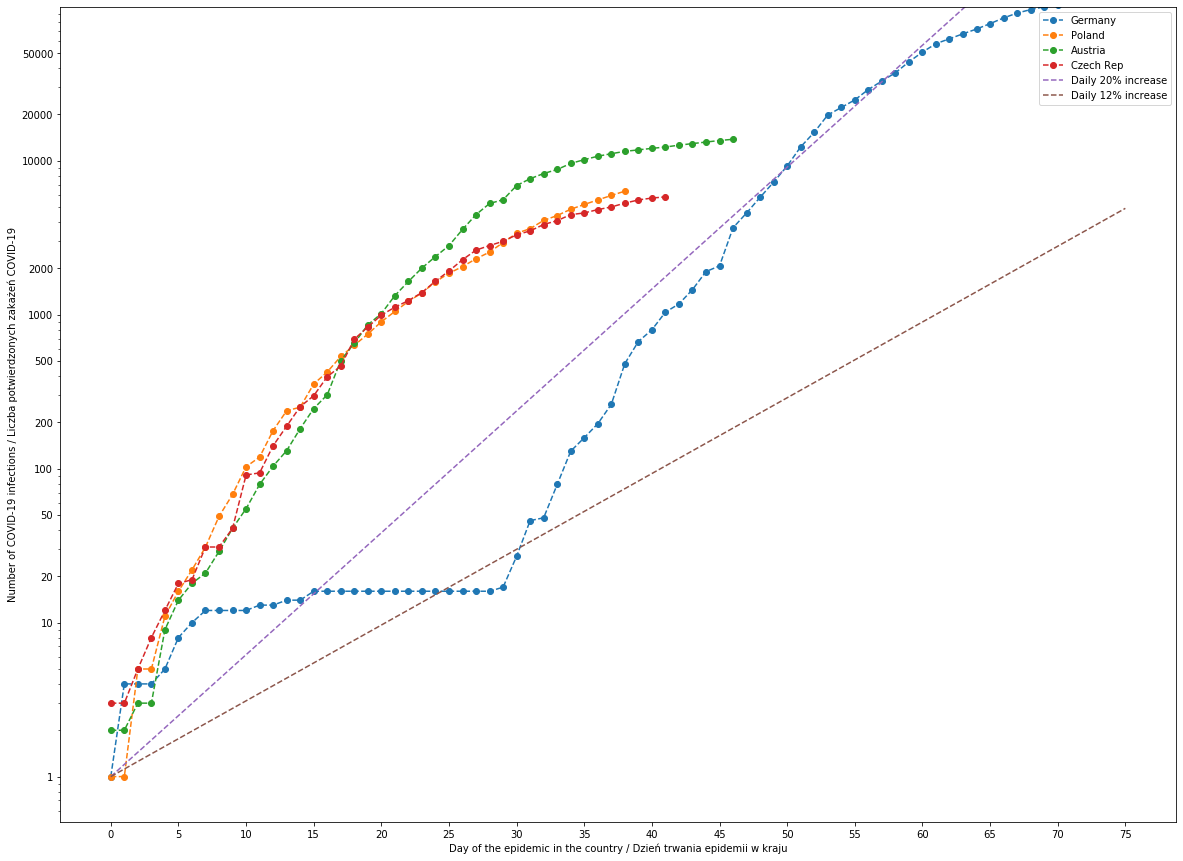

In [12]:
x_axis = range(0, total_days_count)
tick_spacing = 5

fig, ax = plt.subplots(figsize=(20, 15))

for country in selected_countries_data: 
    ax.plot(x_axis[0:len(country.columns)], country.iloc[0, :], linestyle='dashed', marker='o')

# ax.plot(x_axis, germany.iloc[0, :], linestyle='dashed', marker='o')
# ax.plot(x_axis[0:len(poland.columns)], poland.iloc[0, :], linestyle='dashed', marker='o')
# ax.plot(x_axis[0:len(italy.columns)], italy.iloc[0, :], linestyle='dashed', marker='o')

ax.plot(x_axis, daily_20pp_increase, linestyle='dashed')
ax.plot(x_axis, daily_12pp_increase, linestyle='dashed')

#set scale to logarithmic with max value of 100 000
plt.yscale('log')
plt.ylim(0, 100000)
plt.yticks([1, 10, 20, 50, 100, 200, 500, 1000, 2000, 10000, 20000, 50000])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#set legend and labels
ax.legend(['Germany', 'Poland', 'Austria', 'Czech Rep', 'Daily 20% increase', 'Daily 12% increase'])
plt.ylabel('Number of COVID-19 infections / Liczba potwierdzonych zakażeń COVID-19')
plt.xlabel('Day of the epidemic in the country / Dzień trwania epidemii w kraju')

plt.show()

In [11]:
number_of_cases_yesterday = poland.iloc[-1][-1] - poland.iloc[-1][-2]
print(f'New confirmed cases since yesterday / Nowe potwierdzone przypadki od wczoraj: {number_of_cases_yesterday}')

NameError: name 'poland' is not defined